In [3]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
train_df = pd.read_csv("./data/car_data_train.csv")
test_df = pd.read_csv("./data/car_data_test.csv")

In [5]:
train_df.head()

,condition,odometer,mmr,sellingprice,acura,aston martin,audi,bmw,bentley,buick,...,pr,qc,sc,tn,tx,ut,va,wa,wi,goal
0,5,16639,20500,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21500.0
1,5,9393,20800,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21500.0
2,45,1331,31900,30000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,30000.0
3,41,14282,27500,27750,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27750.0
4,43,2641,66000,67000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,67000.0


In [6]:
test_df.head()

,condition,odometer,mmr,sellingprice,acura,aston martin,audi,bmw,bentley,buick,...,pr,qc,sc,tn,tx,ut,va,wa,wi,goal
0,19,202459,2450,700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,700.0
1,29,96223,7250,6600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6600.0
2,24,151225,3925,2900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2900.0
3,34,100106,7325,4200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4200.0
4,29,98624,6675,6700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6700.0


In [7]:
X_train = train_df.drop(columns=['sellingprice'])
y_train = train_df['sellingprice']

In [8]:
X_test = test_df.drop(columns=['sellingprice'])
y_test = test_df['sellingprice']

In [23]:
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

LinearRegression()

In [32]:
baseline_pred = baseline_model.predict(X_train)
mean_squared_error(y_train, baseline_pred, squared=False)

1.605582831794091e-11

In [33]:
baseline_pred[:5]

array([21500., 21500., 30000., 27750., 67000.])

In [34]:
y_train[:5]

0    21500
1    21500
2    30000
3    27750
4    67000
Name: sellingprice, dtype: int64

In [51]:
baseline_test_pred = baseline_model.predict(X_test)
"%.2E" % mean_squared_error(y_test, baseline_test_pred, squared=False)

'1.05E-04'

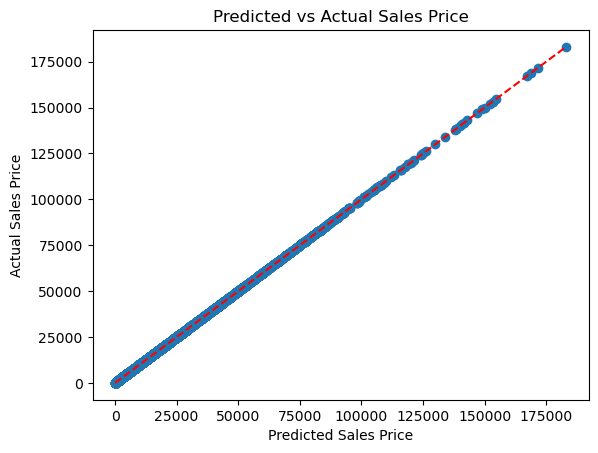

In [50]:
plt.scatter(baseline_test_pred, y_test)
plt.plot([0,y_test.max()], [0, y_test.max()], '--', c='r')
plt.xlabel("Predicted Sales Price")
plt.ylabel("Actual Sales Price")
plt.title("Predicted vs Actual Sales Price")
plt.show()

In [1]:
import organism
from organism import NEATOrganism
from sklearn.preprocessing import StandardScaler

In [2]:
#import organism
organism_model = NEATOrganism.load("model_best_cars_gen_1267.pkl")

In [6]:
import pickle
print(organism_model)
with open("test.pkl", 'rb') as file:
    state = pickle.load(file)

SyntaxError: unmatched ')' (2582264841.py, line 3)

In [3]:
organism_model._layers

AttributeError: 'dict' object has no attribute '_layers'

In [18]:
#since the model was trained with scaled data, we need to scale the test data
scaler = StandardScaler()
onehot_cols = []
numerical_cols = []
for col in X_test.columns:
    if X_test[col].nunique() > 10:
        numerical_cols.append(col)
    else:
        onehot_cols.append(col)



X_test[numerical_cols] = scaler.fit_transform(X_test[numerical_cols])

X_test = np.array(pd.concat([X_test[numerical_cols], X_test[onehot_cols]], axis=1))


In [19]:
#organism test 
organism_test_pred = organism_model.predict(X_test)
"%.2E" % mean_squared_error(y_test, organism_test_pred, squared=False)

c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


'1.78E+04'

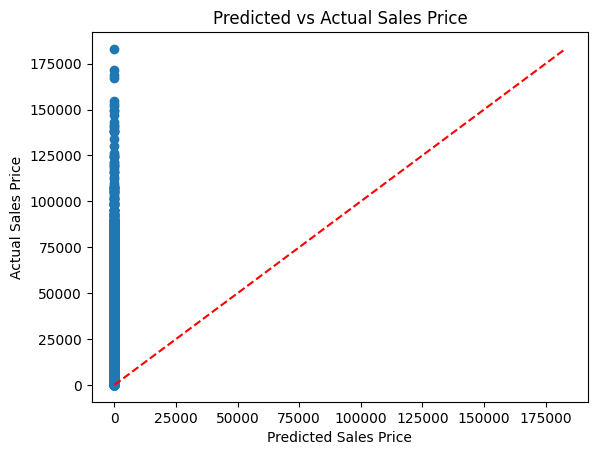

In [20]:
plt.scatter(organism_test_pred, y_test)
plt.plot([0,y_test.max()], [0, y_test.max()], '--', c='r')
plt.xlabel("Predicted Sales Price")
plt.ylabel("Actual Sales Price")
plt.title("Predicted vs Actual Sales Price")
plt.show()